In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 500

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('hyperbolic_new', to_data_frame=True)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results['result.integration_scores'].iloc[0]

,ebm,knn
0,0.293644,0.882843


In [9]:
results['result.f1-score-macro'] = results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['result.f1-score-weighted'] = results['result.classification_report'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
for score in list(results['result.integration_scores'].loc[0].columns):
    results[f'result.{score}'] = results['result.integration_scores'].apply(
        lambda x: x[score]
    )

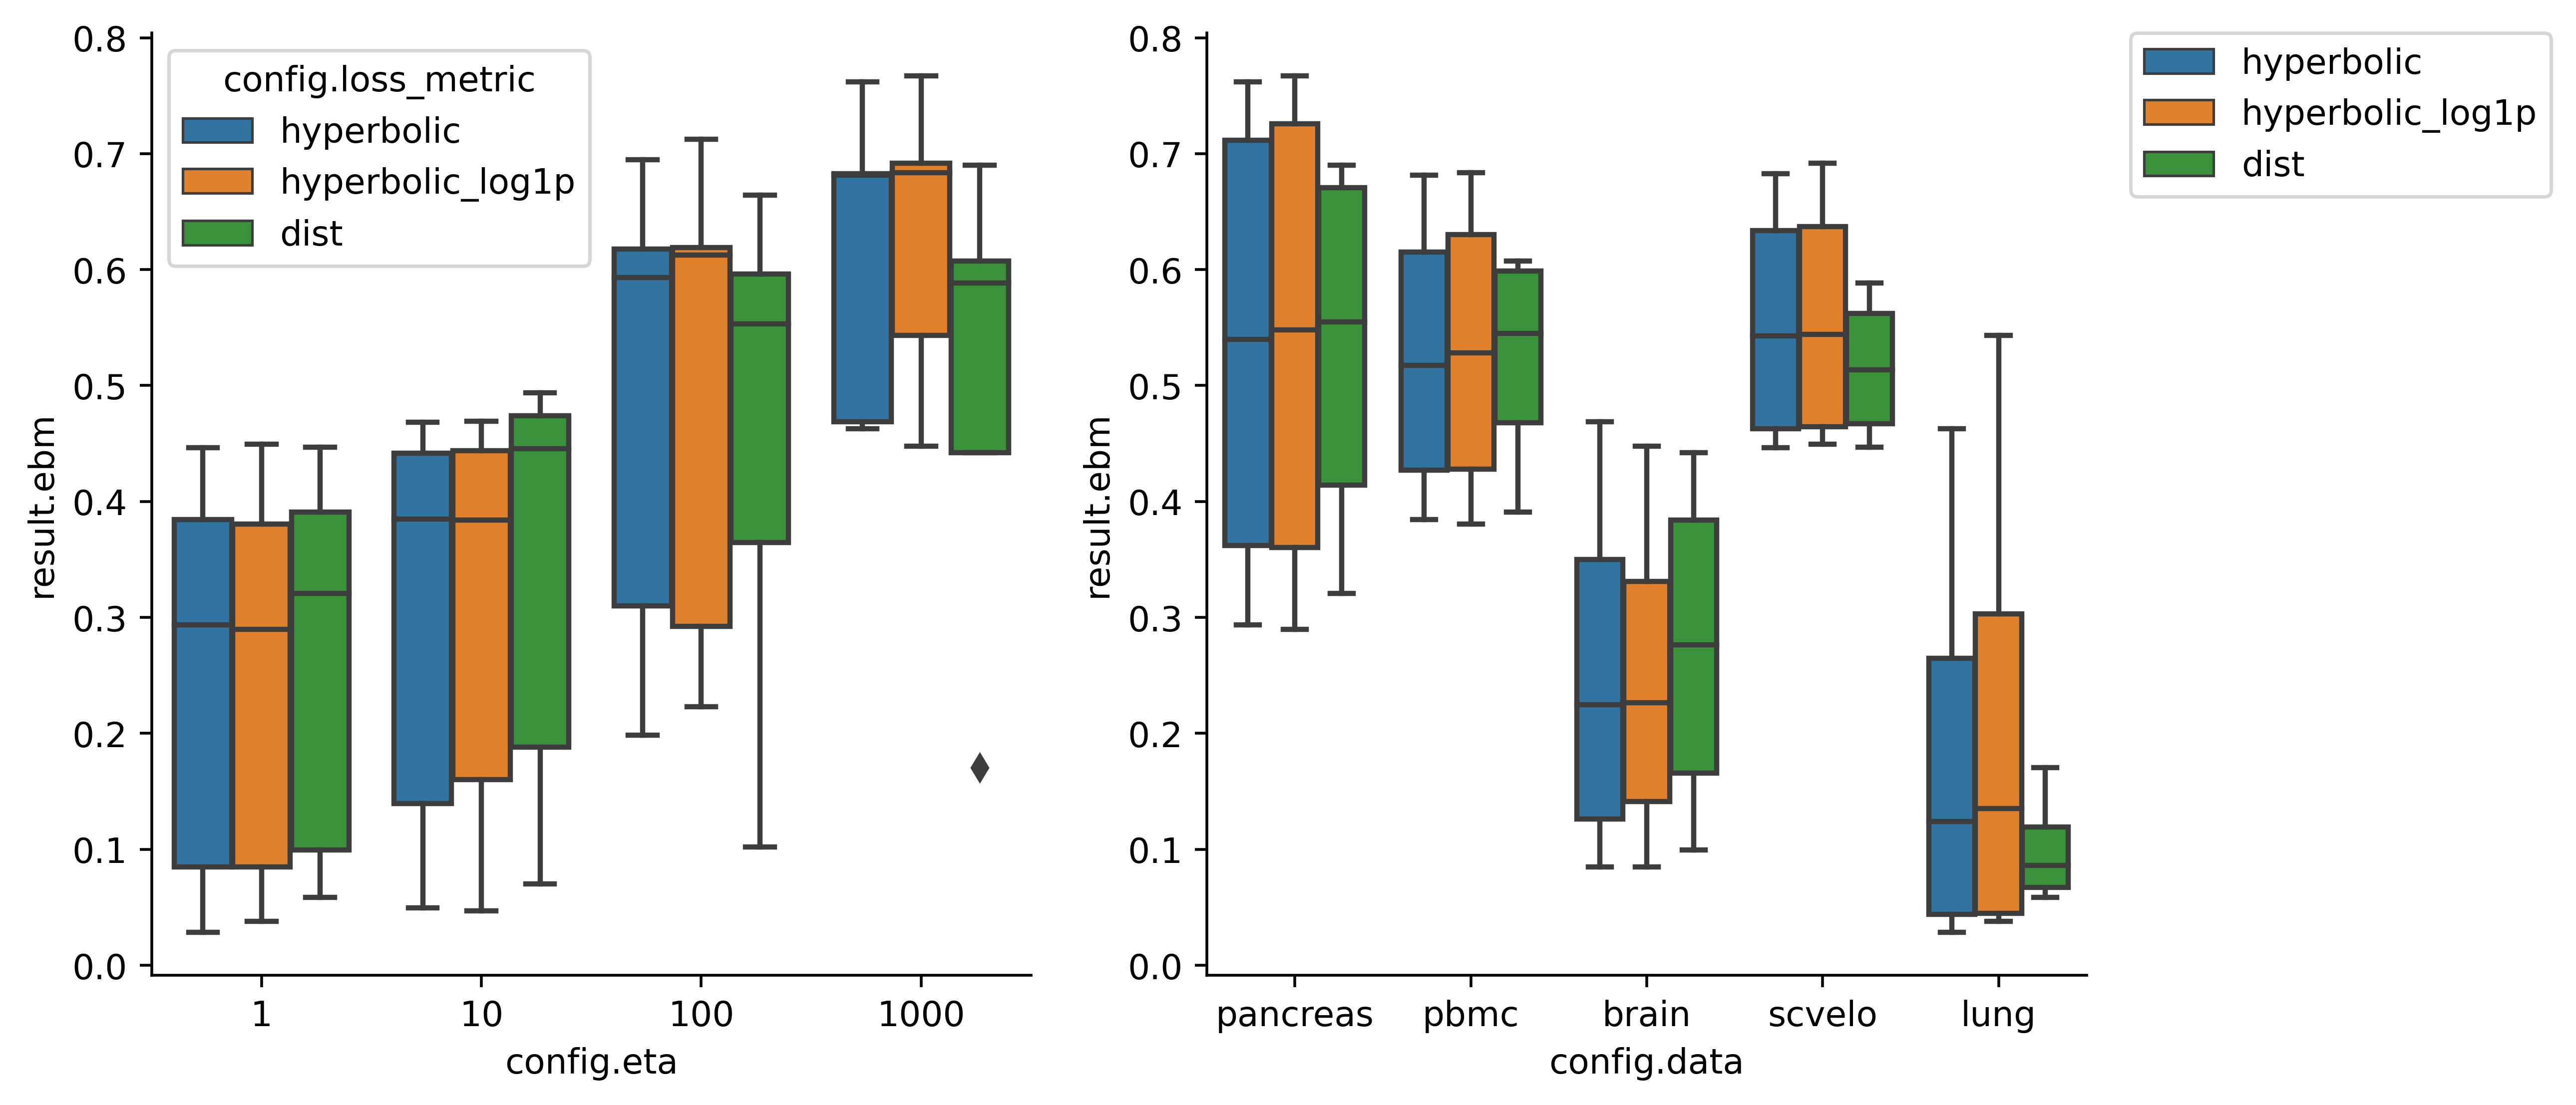

In [5]:
RESULT = 'ebm'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

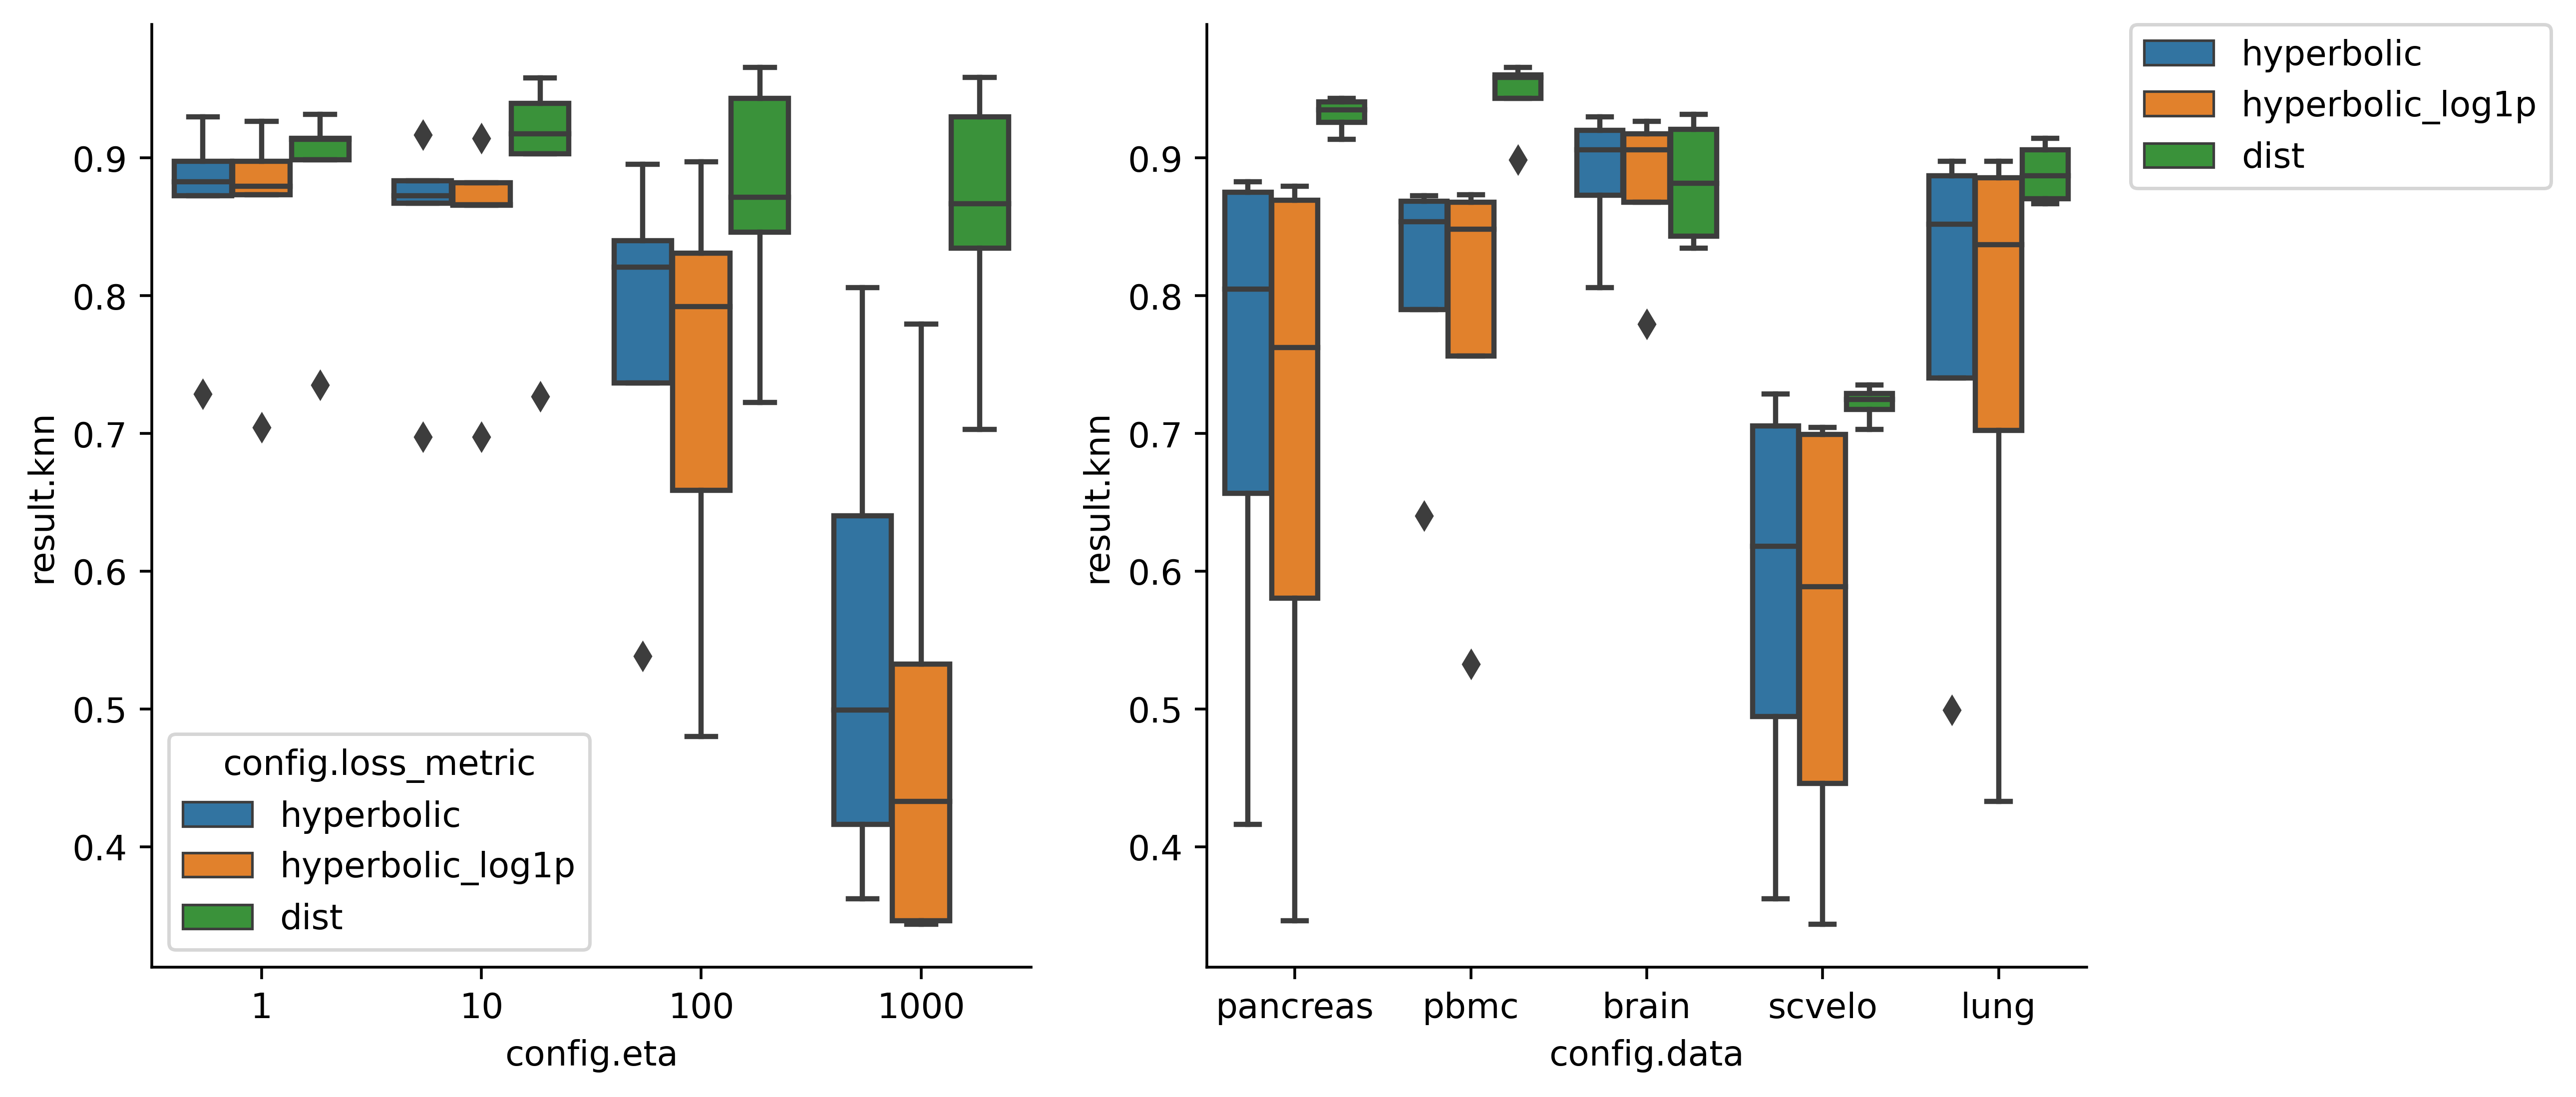

In [6]:
RESULT = 'knn'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

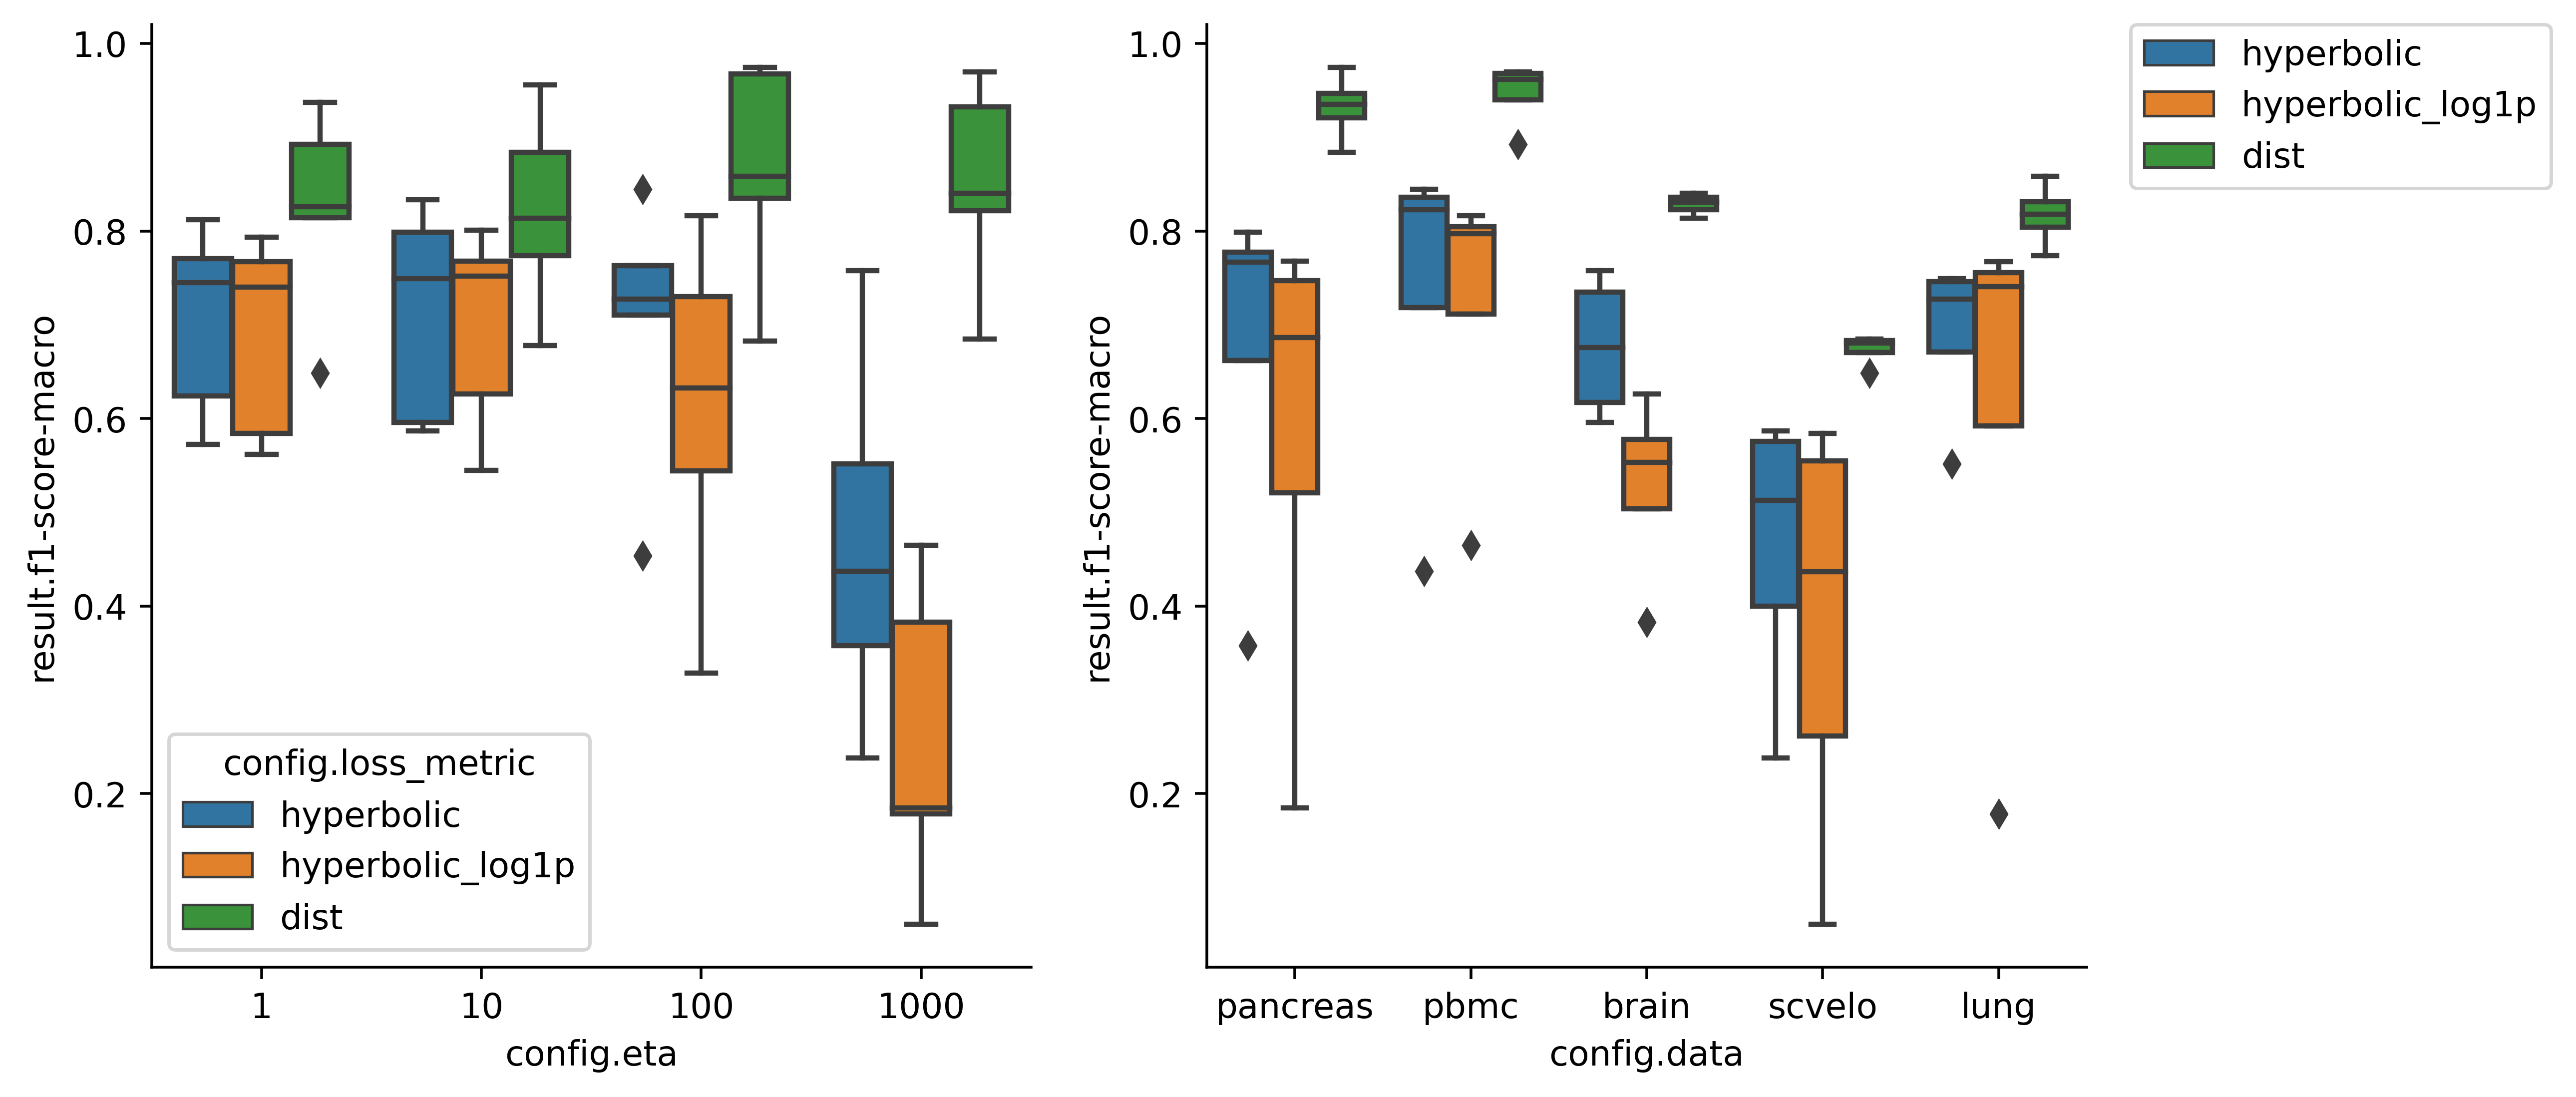

In [10]:
RESULT = 'f1-score-macro'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [ ]:
RESULT = 'f1-score-weighted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()